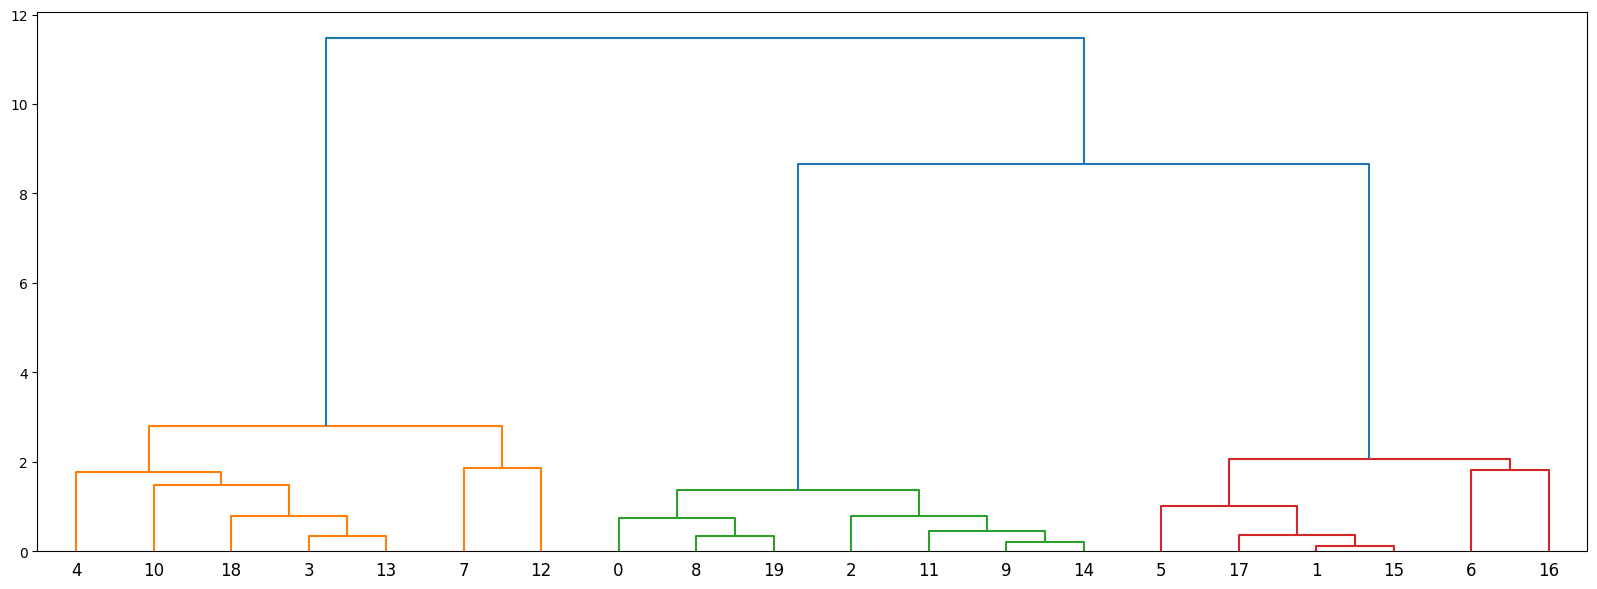

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage


n_samples = 20
n_clusters = 3

x, y = make_blobs(n_samples=n_samples, centers=n_clusters,
                 cluster_std=0.6, random_state=0)

z = linkage(x, 'ward')
plt.figure(figsize=(20, 7))
dendrogram(z)
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from scipy.stats import zscore

In [7]:
df = pd.read_csv('dataset/Cust_Spend.csv')
df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [8]:
df.shape

(10, 7)

In [10]:
attr = df.iloc[:, 2:]
attr.head(2)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9


In [12]:
attr_scaled = attr.apply(zscore)
attr_scaled.head(4)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000


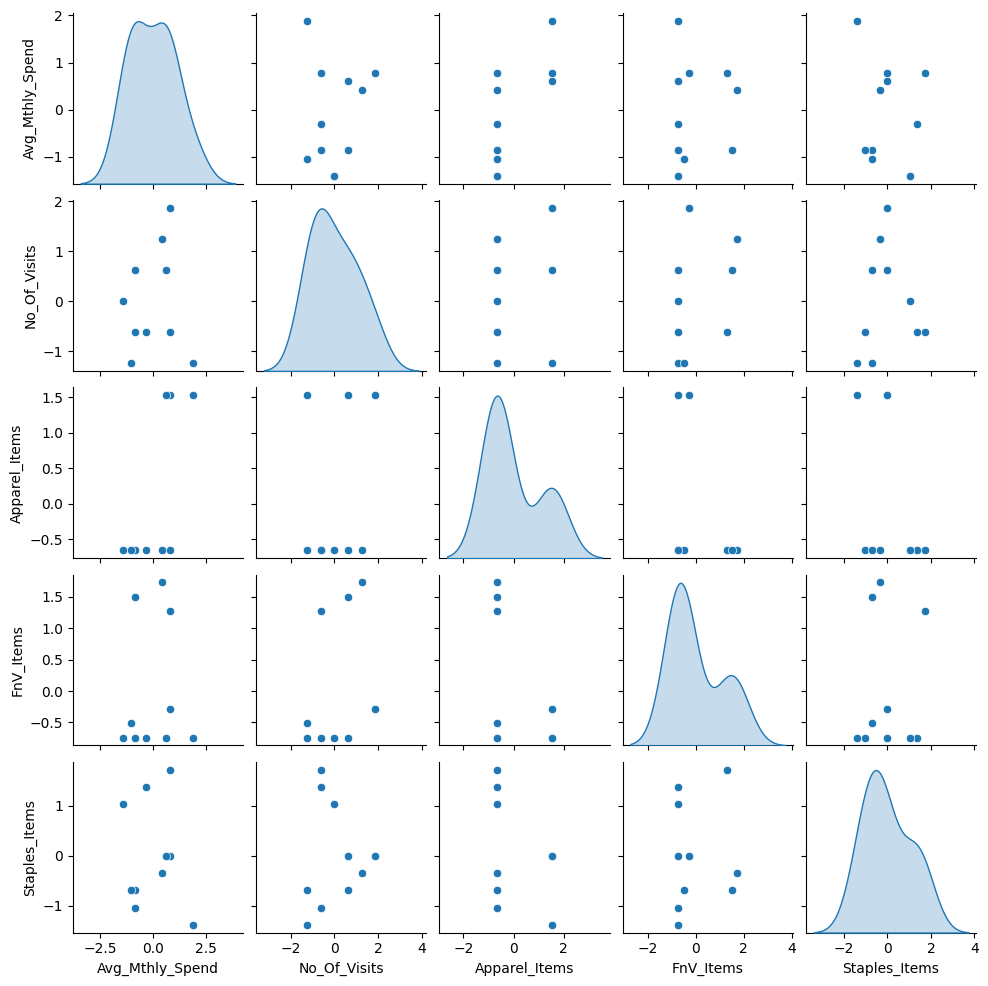

In [16]:
sns.pairplot(attr_scaled, diag_kind='kde', height=2, aspect=1)
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
model = AgglomerativeClustering(n_clusters=3, linkage='average')

In [19]:
model.fit(attr_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [21]:
model.labels_

array([0, 1, 0, 0, 1, 2, 1, 2, 2, 2], dtype=int64)

In [20]:
attr['Labels'] = model.labels_
attr

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


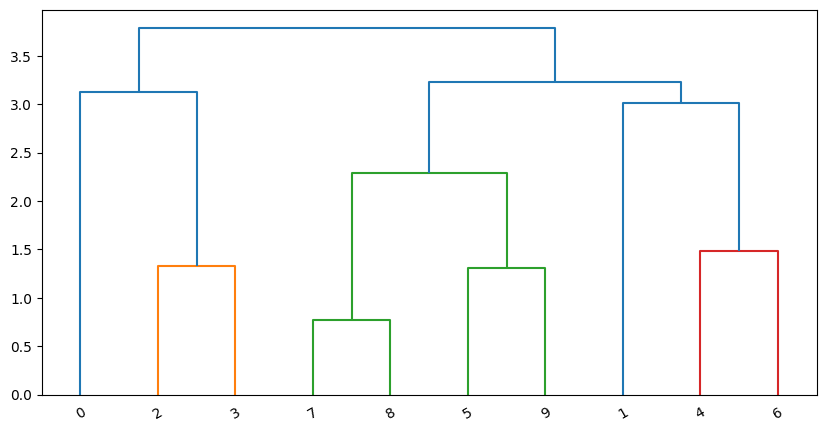

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(attr_scaled, method='average')
plt.figure(figsize=(10, 5))
dendrogram(z, leaf_rotation=30, leaf_font_size=10)
plt.show()